In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cmath
from numba import njit, f8,i8,c16
import numba
import matplotlib.animation as animation
import copy
import matplotlib
import random
import concurrent
import func_for_paralell

import sys
sys.path.append('../../lb')
import RungeKutta_acceralated

#パラメーター
nu = 0.001
f = (1 + 1j) * 5 * 0.001
Dimention = 14 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.5
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
# print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
# print(k_n)

runge_para = {
    'start' :  np.load("14次元初期値.npy"),
    'step' : 0.00025,
    'period' : np.array([0,5000]),
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}



# コンテスト

100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.49it/s]

CPU times: user 7.15 s, sys: 158 ms, total: 7.3 s
Wall time: 8.04 s


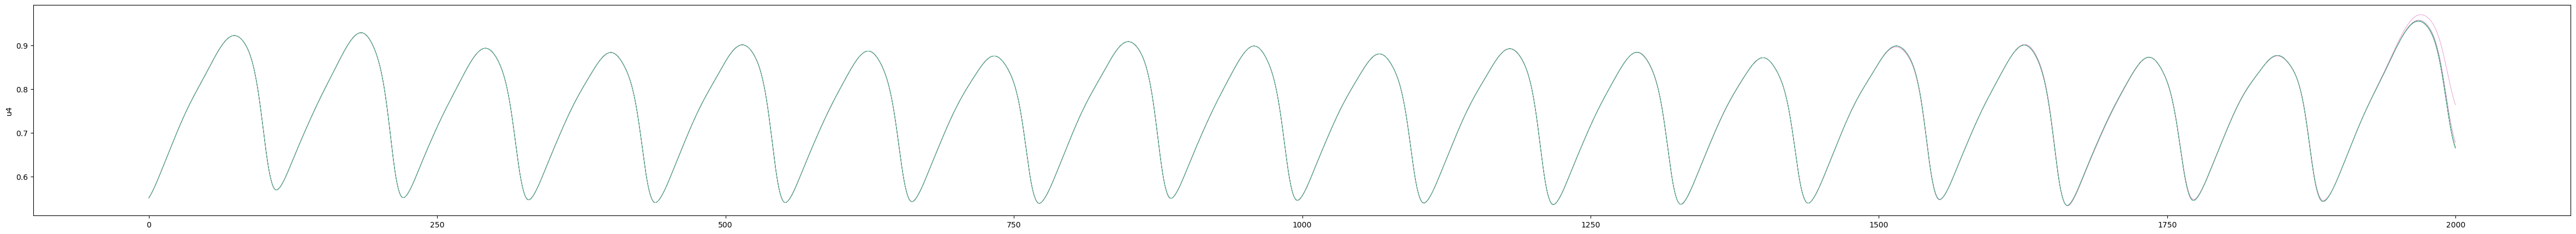

In [2]:
%%time
runge_para["period"]=(0,2000)

#刻み幅
runge_para["step"] = 0.01
skip= 10
competitives = 10

plt.figure(figsize=(60,5))

runge_para['start'] = np.load("nu0.00017795206429227755_beta0.41676767676767673_0.0114dim.npy")

#nu
runge_para["nu"] = 0.00017795206429227755
#betaの値に従いc_n_2,c_n_3を更新
beta= 0.41676767676767673

#c_n_2
runge_para["c_n_2"] = runge_para["k_n"][1:-3, 0:] * -beta
runge_para["c_n_2"][-1, 0:] = np.zeros((1, 1))

#c_n_3
runge_para["c_n_3"] = runge_para["k_n"][:-4, 0:] * (beta - 1)

#摂動を与えた初期値のリスト
starts = np.zeros((14,competitives))
starts = starts.astype(np.complex128)

lmodel = RungeKutta_acceralated.Long_laminar() #インスタンス化
starts[:,0:1] = runge_para["start"]
for i in range(competitives - 1):
    starts[:,i+1:i+2] = lmodel.perturbator(runge_para["start"])

#ラミナーから出た極大値の時間
times = np.zeros((competitives,1))

for i in tqdm(range(competitives)):
    cut_arr = np.zeros((Dimention+1,1))
    
    runge_para['start'] = starts[:,i:i+1]
    #インスタンス化&実行
    model = RungeKutta_acceralated.RungeKutta()
    model.get_arr_latter(**runge_para, latter = 1)
    #プロット
    plt.subplot(1,1,1)
    plt.ylabel(f"u{4}")
    plt.yscale=("log")
    plt.plot(np.real(model.arr_latter[-1,::skip]),abs(model.arr_latter[0,::skip]),lw=0.5)
    
#     #極大抽出
#     cut_arr = loc_max_7(model.arr_latter,cut_arr)
    
#     for j in range(len(cut_arr[0,:])):
#         if not ((0.52 < cut_arr[0,j] < 0.68 or 0.78 < cut_arr[0,j] < 1) 
#             and (0.02 < cut_arr[1,j] < 0.13 or 0.19 < cut_arr[1,j] < 0.34)
#             and (0.12 < cut_arr[2,j] < 0.26 or 0.36 < cut_arr[2,j] < 0.48)
#             and (0.17 < cut_arr[3,j] < 0.24 or 0.25 < cut_arr[3,j] < 0.32 or 0.34 < cut_arr[3,j] < 0.42)
#             and (0.08 < cut_arr[4,j] < 0.2 or 0.28 < cut_arr[4,j] < 0.35)
#             and (0.05 < cut_arr[5,j] < 0.115 or 0.12 < cut_arr[5,j] < 0.155)
#             and (0.03 < cut_arr[6,j] < 0.07 or 0.1 < cut_arr[6,j] < 0.22)
#             and (0.02 < cut_arr[7,j] < 0.08 or 0.104 < cut_arr[7,j] <0.144)
#             and (0.014 < cut_arr[8,j] < 0.078)
#             and (0 < cut_arr[9,j] < 0.036 or 0.048 < cut_arr[9,j] < 0.076 or 0.084 < cut_arr[9,j] < 0.1)
#             and (0 < cut_arr[10,j] < 0.014 or 0.02 < cut_arr[10,j] < 0.038 or 0.046 < cut_arr[10,j] < 0.068)
#             and (0 < cut_arr[11,j] < 0.002 or 0.003 < cut_arr[11,j] < 0.0095 or 0.0135 < cut_arr[11,j] < 0.0225)
#             and (0 < cut_arr[12,j] < 0.0006 or 0.001 < cut_arr[12,j] < 0.0024)
#             and (0 < cut_arr[13,j] < 0.000005 or 0.00001 < cut_arr[13,j] < 0.000045)):
#             times[i,0] = cut_arr[-1,j]
#             break
            
#plt.savefig(fname=f"../laminar/contest_a=-8_b=-15_nu{runge_para['nu']}_beta{beta}_{runge_para['step']}_{Dimention}dim.png")

# print(np.mean(times))
# print(np.std(times))
# print(np.min(times))
# print(np.max(times))

# ラミナーに留まる(長時間)

## stagger and step

In [7]:
np.load("../another_laminar_initials/beta0.418_nu0.00017256_step0.01_2000check_500pro_20000period.npz")["laminar"][-1,-1]

(19999.999999732387+0j)

In [6]:
%%time
runge_para["period"]=np.array([0,20000])

#刻み幅
runge_para["step"] = 0.01
skip= 1

check = 5000
progress = 1000

runge_para['start'] = np.load("../laminar_initials/beta0.418_nu0.00017256_step0.01_10000.0period_laminar.npy")
#nu
runge_para["nu"] = 0.00017256
#betaの値に従いc_n_2,c_n_3を更新
beta = 0.418

#c_n_2
runge_para["c_n_2"] = runge_para["k_n"][1:-3, 0:] * -beta
runge_para["c_n_2"][-1, 0:] = np.zeros((1, 1))
#c_n_3
runge_para["c_n_3"] = runge_para["k_n"][:-4, 0:] * (beta - 1)
lmodel = RungeKutta_acceralated.Long_laminar()
lmodel.get_laminar(**runge_para, check_sec = check, progress_sec = progress)

np.savez_compressed(f"../laminar/beta{beta}_nu{runge_para['nu']}_step{runge_para['step']}_{check}check_{progress}pro_{round(abs(lmodel.arr[-1,-1]))}period",start = lmodel.arr[:-1,0:1], laminar = lmodel.arr)

0時間999時間1999時間

IOStream.flush timed out



 100試行目

IOStream.flush timed out


3000時間

IOStream.flush timed out
IOStream.flush timed out



 900試行目

IOStream.flush timed out


 1000試行目

IOStream.flush timed out


 1600試行目

IOStream.flush timed out


 1700試行目

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


 1800試行目

IOStream.flush timed out
IOStream.flush timed out


 1900試行目

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


 2000試行目

IOStream.flush timed out
IOStream.flush timed out


KeyboardInterrupt: 

AttributeError: 'Long_laminar' object has no attribute 'perturbated_time'

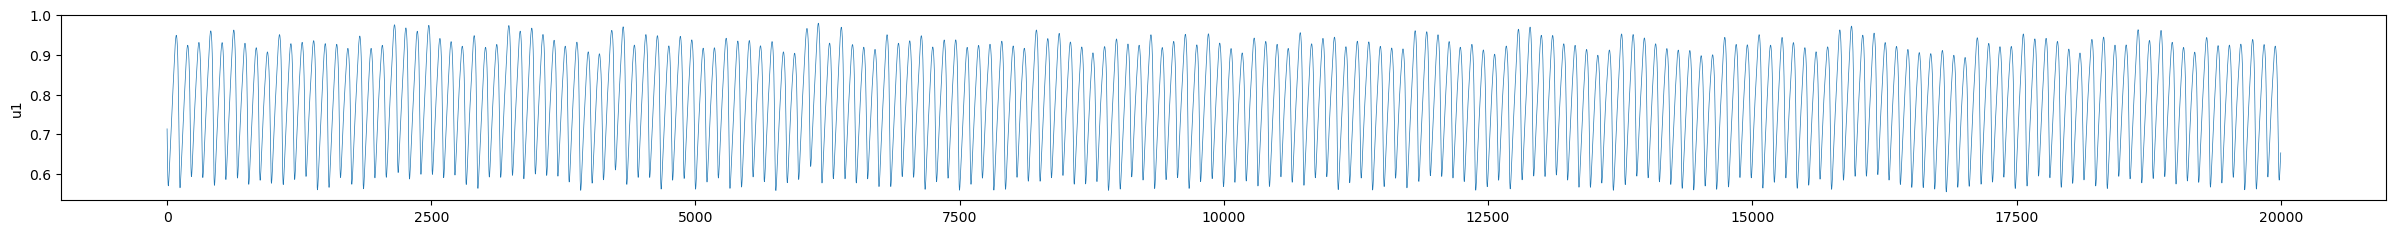

In [8]:
lmodel.arr = np.load("/Users/hibiki/Downloads/beta0.418_nu0.00017256_step0.01_2000check_500pro_20000period.npz")["laminar"]
skip=1
plt.figure(figsize=(30,40))

for i in range(len(lmodel.arr[:-1,0])):
    plt.subplot(len(lmodel.arr[:-1,0]),1,i+1)
    plt.ylabel(f"u{i+1}")
    #plt.yscale=("log")
    plt.plot(np.real(lmodel.arr[-1,::skip]),abs(lmodel.arr[i,::skip]),lw=0.5)
    for j in range(len(lmodel.perturbated_time)):
        plt.vlines(x=lmodel.perturbated_time[j], ymin=np.min(abs(lmodel.arr[i,:])), ymax=np.max(abs(lmodel.arr[i,:])),colors="red")
plt.savefig(fname=f"../laminar/nu{runge_para['nu']}_beta{beta}_{runge_para['step']}_{check}check_{progress}progress_{runge_para['period'][1]}.png")

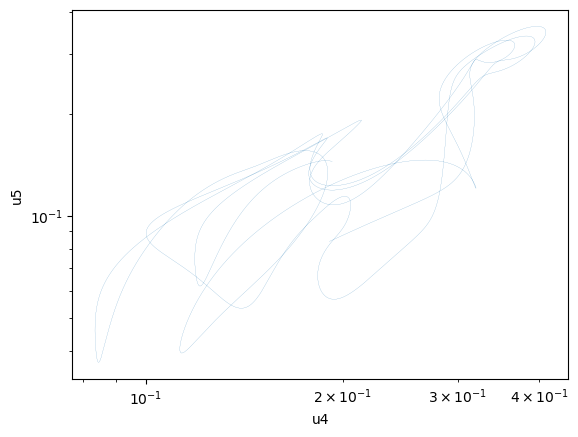

In [36]:
a, b = 3, 4
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.set_xlabel(f"u{a+1}")
ax.set_ylabel(f'u{b+1}')
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.abs(model.arr_latter[a,:30000]),np.abs(model.arr_latter[b,:30000]),lw=0.1)